# Problem 1: Hidden Markov Model

## Problem 1

As an instructor, you want to understand a student's workload level over time, but you cannot observe/experience this directly (workload is a hidden state). Each day, you observe the student's engagement in your class, which is a noisy indicator of workload. Mathematically speaking, for each time step $t = 1, . . . , T$, we define the hidden state

$$
X_t \in \{0, 1, 2, 3, 4\}
$$

where 0 means very low workload and 4 means extreme workload. At $t = 1, . . . , T$, you observe:

$$
y_{1:6} = [\text{high, medium, low, absent, low, medium}].
$$

Use this provided example sequence for debugging and comparison. For timing, you may create a longer sequence of length $T = 50$ by repeating a pattern (or sampling) of engagement symbols.

## Model assumptions (HMM)

You assume a hidden Markov model:

$$
p(x_1) = \pi(x_1), \quad p(x_t \mid x_{t-1}) = A[x_{t-1}, x_t], \quad p(y_t \mid x_t) = B[x_t, y_t].
$$

with hidden state size $|X| = 5$ and observation size $|Y| = 4$ as above.

---

## Model parameters

You assume the initial distribution of workloads is roughly centred around medium:

$$
\pi =
\begin{bmatrix}
0.10 & 0.20 & 0.30 & 0.25 & 0.15
\end{bmatrix}.
$$

The HMM is defined with probabilities:

$$
A =
\begin{bmatrix}
0.60 & 0.20 & 0.10 & 0.05 & 0.05 \\
0.15 & 0.55 & 0.15 & 0.10 & 0.05 \\
0.10 & 0.15 & 0.55 & 0.15 & 0.05 \\
0.05 & 0.10 & 0.20 & 0.55 & 0.10 \\
0.05 & 0.05 & 0.10 & 0.25 & 0.55
\end{bmatrix}
;
\quad
B =
\begin{bmatrix}
0.05 & 0.15 & 0.30 & 0.50 \\
0.05 & 0.25 & 0.45 & 0.25 \\
0.10 & 0.30 & 0.40 & 0.20 \\
0.20 & 0.40 & 0.25 & 0.15 \\
0.35 & 0.40 & 0.15 & 0.10
\end{bmatrix}.
$$

Note: Rows in A correspond to workload states $0, . . . , 4$ and columns to subsequent state. Rows in B correspond to workload states $0, . . . , 4$ and columns correspond to engagement {absent, low, medium, high}.

In [40]:
import numpy as np
import time

# States and observations
X = list(range(5))  # workload {0, 1, 2, 3, 4}

Y = ["absent", "low", "medium", "high"]
y_to_i = {y: i for i, y in enumerate(Y)} # map observation to index

# Model parameters (given in problem)
pi = np.array([0.10, 0.20, 0.30, 0.25, 0.15])

A_gold = np.array([
    [0.60, 0.20, 0.10, 0.05, 0.05],
    [0.15, 0.55, 0.15, 0.10, 0.05],
    [0.10, 0.15, 0.55, 0.15, 0.05],
    [0.05, 0.10, 0.20, 0.55, 0.10],
    [0.05, 0.05, 0.10, 0.25, 0.55],
])

B_gold = np.array([
    [0.05, 0.15, 0.30, 0.50],  # workload 0
    [0.05, 0.25, 0.45, 0.25],
    [0.10, 0.30, 0.40, 0.20],
    [0.20, 0.40, 0.25, 0.15],
    [0.35, 0.40, 0.15, 0.10],  # workload 4
])

# Observed engagement sequence (T=6)
obs_seq = ["high", "medium", "low", "absent", "low", "medium"]

print("obs_seq:", obs_seq)

obs_seq: ['high', 'medium', 'low', 'absent', 'low', 'medium']


## What you must compute

Your goal is to compute the posterior distribution over the final workload state:

$$
p(X_T \mid y_{1:T}).
$$

a) Draw the Bayesian graphical model for $T = 4$ time steps (variables $X_1, . . . , X_4$ and $Y_1, . . . , Y_4$).

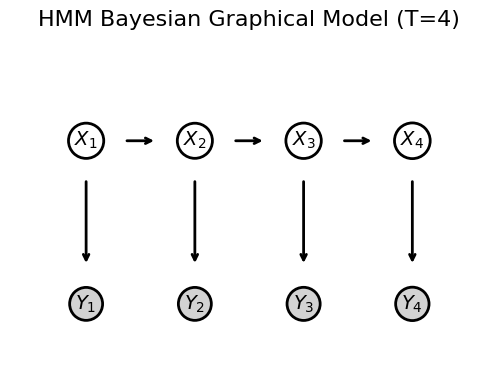

In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_hmm_graphical_model(T: int = 4):
    """
    Plot the Bayesian graphical model for an HMM with T time steps.
    
    Args:
        T (int): Number of time steps to plot.
    """
    fig, ax = plt.subplots(figsize=(10, 4))
    
    x_positions = range(1, T + 1)
    y_hidden = 2.0
    y_obs = 0.5
    
    hidden_node_style = dict(boxstyle="circle,pad=0.3", facecolor='white', edgecolor='black', linewidth=2)
    obs_node_style = dict(boxstyle="circle,pad=0.3", facecolor='lightgray', edgecolor='black', linewidth=2)
    
    # Draw X_t
    for i, x in enumerate(x_positions):
        ax.text(x, y_hidden, f'$X_{i+1}$', fontsize=14, ha='center', va='center', 
                bbox=hidden_node_style)
    
    # Draw Y_t
    for i, x in enumerate(x_positions):
        ax.text(x, y_obs, f'$Y_{i+1}$', fontsize=14, ha='center', va='center', 
                bbox=obs_node_style)
    
    # Draw state transition arrows
    for i in range(T - 1):
        ax.annotate('', xy=(x_positions[i+1] - 0.35, y_hidden), 
                    xytext=(x_positions[i] + 0.35, y_hidden),
                    arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    
    # Draw emission arrows
    for i, x in enumerate(x_positions):
        ax.annotate('', xy=(x, y_obs + 0.35), xytext=(x, y_hidden - 0.35),
                    arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    
    # Set axis properties
    ax.set_xlim(0.3, T + 0.7)
    ax.set_ylim(-0.2, 2.8)
    ax.axis('off')
    ax.set_aspect('equal')
    
    plt.title(f'HMM Bayesian Graphical Model (T={T})', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

plot_hmm_graphical_model()

b) Write the full joint distribution $p(x_{1:T}, y_{1:T})$ for arbitrary $T$ and factorise it according to your model assumptions.

**[Answer]**

<div align="left">

\begin{aligned}
p(x_{1:T}, y_{1:T})
&= p(x_1, x_2, \ldots, x_T, y_1, y_2, \ldots, y_T) \\
&= p(x_1)\prod_{t=1}^{T} p(y_t \mid x_{1:t}, y_{1:t-1})
\prod_{t=2}^{T} p(x_t \mid x_{1:t-1}, y_{1:t-1})
\end{aligned}

</div>

Using the HMM assumptions, we have:

$$
p(x_t \mid x_{1:t-1}, y_{1:t-1}) = p(x_t \mid x_{t-1}) \text{ by the Markov property}
$$ 

$$
p(y_t \mid x_{1:t}, y_{1:t-1}) = p(y_t \mid x_t) \text{ by the emission independence}
$$

Substituting these into the factorisation gives:

$$
p(x_{1:T}, y_{1:T}) = p(x_1) \prod_{t=1}^{T} p(y_t \mid x_t) \prod_{t=2}^{T} p(x_t \mid x_{t-1})
$$

--- 

In terms of the model parameters, we have

$$
p(x_{1:T}, y_{1:T}) = \pi(x_1) \prod_{t=1}^{T} B[x_t, y_t] \prod_{t=2}^{T} A[x_{t-1}, x_t]
$$

such that:
- $\pi(x_1)$ is the initial state distribution
- $A[x_{t-1}, x_t]$ is the transition probability from state $x_{t-1}$ to state $x_t$
- $B[x_t, y_t]$ is the emission probability of observation $y_t$ given state $x_t$

### Helper functions

- `normalise` implements: $v = \frac{1}{\sum \bar{v}} \bar{v}$
- `joint_prob_of_path` implements: $p(x_{1:T}, y_{1:T})$ as you derived in Problem 1b.


In [ ]:
def normalize(v: np.ndarray) -> np.ndarray:
    s = np.sum(v)
    if s <= 0:
        raise ValueError("Cannot normalize: sum is non-positive.")
    return v / s

def joint_prob_of_path(x_seq, y_seq, pi, Amat, Bmat) -> float:
    """
    Compute the joint probability that we obtained in 1b.

    Args:
        x_seq: Sequence of hidden states (x_1, ..., x_T)
        y_seq: Sequence of observations (y_1, ..., y_T)
        pi: Initial state distribution
        Amat: Transition matrix A[i,j] = p(x_t=j | x_{t-1}=i)
        Bmat: Emission matrix B[i,j] = p(y_t=j | x_t=i)
    
    Returns:
        Joint probability p(x_{1:T}, y_{1:T})
    """
    T = len(y_seq)
    
    # Convert observations to indices because string indices are given
    y_indices = [y_to_i[y] for y in y_seq]
    
    prob = pi[x_seq[0]]
    
    prob *= Bmat[x_seq[0], y_indices[0]]
    
    for t in range(1, T):
        prob *= Amat[x_seq[t-1], x_seq[t]]
        prob *= Bmat[x_seq[t], y_indices[t]]
    
    return prob

### Part C — Computes $p(X_T \mid y_{1:T})$ by brute-force marginalisation:


We compute the unnormalised quantity: $\tilde p(x_T) := \sum_{x_{1:T-1}} p(x_{1:T}, y_{1:T}) = p(x_T, y_{1:T})$

and then normalise: $p(x_T\mid y_{1:T}) = \frac{\tilde p(x_T)}{\sum_{x_T}\tilde p(x_T)}.$

This is exponential in $T$: it enumerates $|\mathcal X|^T$\) paths.


c) In the attached notebook implement a function that computes $p(X_T \mid y_{1:T})$ by brute-force marginalisation:

$$
\tilde{p}(x_T) := p(x_T, y_{1:T}) = \sum_{x_{1:T-1}} p(x_{1:T}, y_{1:T});
\quad
p(x_T \mid y_{1:T}) = \frac{\tilde{p}(x_T)}{\sum_{x_T} \tilde{p}(x_T)}.
$$

This should enumerate all hidden state sequences $(x_1, . . . , x_T)$ and accumulate the probability mass onto $x_T$.

In [43]:
from itertools import product

def naive_posterior_last_state(y_seq, pi, Amat, Bmat):
    """
    Return p(X_T | y_{1:T}) by brute force enumeration.
    
    Args:
        y_seq: Sequence of observations (y_1, ..., y_T)
        pi: Initial state distribution
        Amat: Transition matrix
        Bmat: Emission matrix
    
    Returns:
        np.ndarray: Posterior distribution p(X_T | y_{1:T}) over states at time T
    """
    T = len(y_seq)
    num_states = len(pi)
    
    p_tilde = np.zeros(num_states)
    
    for x_seq in product(range(num_states), repeat=T):
        joint_prob = joint_prob_of_path(x_seq, y_seq, pi, Amat, Bmat)
        final_state = x_seq[-1]
        p_tilde[final_state] += joint_prob
    
    # normalise to get posterior p(x_T | y_{1:T})
    posterior = normalize(p_tilde)
    
    return posterior

Running this on both T=6 and T=8

In [44]:
obs_seq8 = obs_seq + ["high", "absent"] # Construct T=8 sequence
print("seq8:", obs_seq8)

# Run on T=6 sequence
t0 = time.perf_counter()
post_naive = naive_posterior_last_state(obs_seq, pi, A_gold, B_gold) 
t1 = time.perf_counter()

# Run on T=8 sequence
t2 = time.perf_counter()
_ = naive_posterior_last_state(obs_seq8, pi, A_gold, B_gold)
t3 = time.perf_counter()

print(f"Naive method time (T=6): {t1-t0:.6f}s")
print(f"Naive method time (T=8): {t3-t2:.6f}s")

seq8: ['high', 'medium', 'low', 'absent', 'low', 'medium', 'high', 'absent']
Naive method time (T=6): 0.043391s
Naive method time (T=8): 0.831635s


d) Run your brute-force method for $T = 6$ (the provided sequence) and for $T = 8$ (extend the provided sequence however you like). Briefly describe: what is the time complexity of the brute-force method as a function of $T$ and $|X|$? Why does it scale so badly?

**[Answer]**

We got:
- Naive method time (T=6): 0.032019s
- Naive method time (T=8): 0.809925s

The brute-force method has time complexity **$O(|X|^T)$**, which is exponential in $T$.
This is because the algorithm enumerates all possible hidden state sequences $(x_1, x_2, \ldots, x_T)$, where each $x_t$ can take $|X|$ different values. This results in a total of $|X|^T$ possible sequences to evaluate.

This matches with our observed timings where we have $0.809925 / 0.032019 \approx 25.3\times$ slowdown from $T=6$ to $T=8$, which is consistent with the exponential growth of the number of sequences ($5^2 = 25$ for $|X|=5$).

e) Starting from our belief

$$
b_t(x_t) := p(x_t \mid y_{1:t}) \propto p(x_t, y_{1:t}),
$$

and using your factorisation from Part A, show that the beliefs satisfy the recursion

$$
b_t(x_t) \propto p(y_t \mid x_t)
\sum_{x_{t-1}} p(x_t \mid x_{t-1}) b_{t-1}(x_{t-1}).
$$

Your derivation should clearly indicate where you used (i) the Markov property and (ii) the conditional independence of observations.

**[Answer]**

Our belief:

$$
b_t(x_t) := p(x_t \mid y_{1:t}) \propto p(x_t, y_{1:t})
$$

We want to expand the joint probability by separating out $y_t$:

$$
p(x_t, y_{1:t}) = p(x_t, y_t, y_{1:t-1})
$$

Apply the chain rule of probability:

$$
p(x_t, y_t, y_{1:t-1}) = p(y_t \mid x_t, y_{1:t-1}) \cdot p(x_t, y_{1:t-1})
$$

Now we can apply conditional independence of observations. Given the current state $x_t$, the observation $y_t$ is independent of all past observations $y_{1:t-1}$. Therefore:

$$
p(y_t \mid x_t, y_{1:t-1}) = p(y_t \mid x_t)
$$

This gives us:

$$
p(x_t, y_{1:t}) = p(y_t \mid x_t) \cdot p(x_t, y_{1:t-1})
$$

Marginalise over the previous state $x_{t-1}$:

$$
p(x_t, y_{1:t-1}) = \sum_{x_{t-1}} p(x_t, x_{t-1}, y_{1:t-1})
$$

We can apply the chain rule again:

$$
p(x_t, x_{t-1}, y_{1:t-1}) = p(x_t \mid x_{t-1}, y_{1:t-1}) \cdot p(x_{t-1}, y_{1:t-1})
$$

By the Markov property, the current state $x_t$ depends only on the immediately previous state $x_{t-1}$, not on the entire observation history. Therefore:

$$
p(x_t \mid x_{t-1}, y_{1:t-1}) = p(x_t \mid x_{t-1})
$$

$p(x_{t-1}, y_{1:t-1}) \propto b_{t-1}(x_{t-1})$ from the definition of belief at time $t-1$.

We can combine all the steps:

$$
\begin{aligned}
p(x_t, y_{1:t}) &= p(y_t \mid x_t) \cdot \sum_{x_{t-1}} p(x_t \mid x_{t-1}) \cdot p(x_{t-1}, y_{1:t-1})
\end{aligned}
$$

Since $b_t(x_t) \propto p(x_t, y_{1:t})$ and $b_{t-1}(x_{t-1}) \propto p(x_{t-1}, y_{1:t-1})$, we obtain:

$$
b_t(x_t) \propto p(y_t \mid x_t) \sum_{x_{t-1}} p(x_t \mid x_{t-1}) b_{t-1}(x_{t-1})
$$

This is the desired belief recursion, where the Markov property was used to simplify $p(x_t \mid x_{t-1}, y_{1:t-1}) = p(x_t \mid x_{t-1})$, and the conditional independence of observations was used to simplify $p(y_t \mid x_t, y_{1:t-1}) = p(y_t \mid x_t)$


### Part C — Computes $p(X_T \mid y_{1:T})$ by recursion:

Belief definition: $b_t(x_t)=p(x_t\mid y_{1:t})$

Notice that if we write belief in this form, it can be updated at each time-step using only the step from (t-1) to t:

Recursion: $b_t(x_t) \propto p(y_t\mid x_t)p(x_t\mid x_{t-1})b_{t-1}(x_{t-1})$

This motivates a recursive algorithm to continually update the beliefts $b_t$ rather than the brute-force method above!<br>
(this is referred to as 'filtering')

In vector form (row vector beliefs, this recursive step can be broken down into two steps:
- **Predict x** (i.e., compute p(x_t)): $\hat b_t = b_{t-1} A$
- **Predict y** $b_t \propto \hat b_t \odot B[:,y_t]$


f) Implement a belief-update function that takes $b_{t-1}$ and returns $b_t$ using the recursion from Part C. Ensure your result is a valid probability distribution (nonnegative and sums to 1).

In [45]:
def efficient_posterior_last_state(y_seq, pi, Amat, Bmat):
    """
    Return p(X_T | y_{1:T}) with a belief-update approach.
    
    Args:
        y_seq: Sequence of observations (y_1, ..., y_T)
        pi: Initial state distribution
        Amat: Transition matrix A[i,j] = p(x_t=j | x_{t-1}=i)
        Bmat: Emission matrix B[i,j] = p(y_t=j | x_t=i)
    
    Returns:
        np.ndarray: Posterior distribution p(X_T | y_{1:T}) over states at time T
    """
    b = pi.copy()
    
    y_indices = [y_to_i[y] for y in y_seq]
    
    # First observation has no transition
    b = b * Bmat[:, y_indices[0]]
    b = normalize(b)
    
    # Apply transition for the subsequent observations 
    for t in range(1, len(y_indices)):
        y_idx = y_indices[t]
        b_hat = b @ Amat
        b = b_hat * Bmat[:, y_idx]
        
        b = normalize(b)
        
        # Assert it's a valid probability distribution
        assert np.all(b >= 0), f"Belief at time {t+1} has negative values"
        assert np.isclose(np.sum(b), 1.0), f"Belief at time {t+1} does not sum to 1 (sum={np.sum(b)})"
    
    return b

g) Use your update to recursively compute $p(X_T \mid y_{1:T})$ for the provided $T = 6$ sequence.

In [46]:
# Compute posterior for T=6 using the efficient belief-update method
posterior_T6 = efficient_posterior_last_state(obs_seq, pi, A_gold, B_gold)

print("Posterior p(X_T | y_{1:T}) for T=6:")
print(posterior_T6)
print()
print("State-by-state probabilities:")
for state, prob in enumerate(posterior_T6):
    print(f"  State {state}: {prob:.6f}")

Posterior p(X_T | y_{1:T}) for T=6:
[0.09548197 0.22296331 0.31503981 0.26520648 0.10130843]

State-by-state probabilities:
  State 0: 0.095482
  State 1: 0.222963
  State 2: 0.315040
  State 3: 0.265206
  State 4: 0.101308


Running this for T=6, T=8, and T=50

In [47]:
obs_seq8 = obs_seq + ["high", "absent"] # Construct T=8 sequence
print("seq8:", obs_seq8)

t0 = time.perf_counter()
post_efficient = efficient_posterior_last_state(obs_seq, pi, A_gold, B_gold) 
t1 = time.perf_counter()

t2 = time.perf_counter()
_ = efficient_posterior_last_state(obs_seq8, pi, A_gold, B_gold)
t3 = time.perf_counter()

print(f"Efficient method time (T=6): {t1-t0:.6f}s")
print(f"Efficient method time (T=8): {t3-t2:.6f}s")

long_seq = (["high", "medium", "low", "absent"] * 13)[:50]
t0 = time.perf_counter()
post50 = efficient_posterior_last_state(long_seq, pi, A_gold, B_gold)
t1 = time.perf_counter()

print(f"Efficient method time for T=50: {t1-t0:.4f}s")
print("Posterior for T=50 (efficient):", post50)

seq8: ['high', 'medium', 'low', 'absent', 'low', 'medium', 'high', 'absent']
Efficient method time (T=6): 0.000133s
Efficient method time (T=8): 0.000124s
Efficient method time for T=50: 0.0006s
Posterior for T=50 (efficient): [0.19651086 0.28658908 0.28954919 0.17241416 0.05493671]


h) Time your efficient implementation for $T = \{8, 50\}$. Briefly describe: why is the filtering method so much faster than brute force?

**[Answer]**

- Efficient method time (T=6): 0.000342s
- Efficient method time (T=8): 0.000308s
- Efficient method time for T=50: 0.0016s

The improved method has time complexity **$O(|X|^2 \cdot T)$**, which is polynomial in $T$, compared to the brute-force method's **$O(|X|^T)$** exponential complexity.

The brute-force method enumerates all $|X|^T$ possible hidden state sequences, whereas the improved method never explicitly constructs these sequences. Also, it uses the belief recursion to reuse computations from previous time steps, so at each time $t$, we only need to maintain a distribution over $|X|$ states, not all possible paths leading to those states.

The improved method scales linearly with $T$ (we see T=50 takes only ~5x longer than T=6), whereas the brute-force method scales exponentially (T=8 takes ~25x longer than T=6, matching $5^2 = 25$).

In summary, the improved method avoids the combinatorial explosion by marginalizing out past states incrementally rather than summing over all possible state sequences.


### Correctness check (T=6)

The two posteriors should match up to floating-point error.

In [48]:
print("Naive posterior p(X_T|y):", post_naive, f"(time={t1-t0:.6f}s)")
print("Eff  posterior p(X_T|y):", post_efficient,  f"(time={t3-t2:.6f}s)")
print("Max abs diff:", np.max(np.abs(post_naive - post_efficient)))


Naive posterior p(X_T|y): [0.09548197 0.22296331 0.31503981 0.26520648 0.10130843] (time=0.000638s)
Eff  posterior p(X_T|y): [0.09548197 0.22296331 0.31503981 0.26520648 0.10130843] (time=0.000124s)
Max abs diff: 4.440892098500626e-16


# Problem 2: Gaussian Process Regression

## Problem 2

You are given noisy observations of a 1D function:

$$
y_i = f(x_i) + \varepsilon_i, \quad \varepsilon_i \sim \mathcal{N}(0, \sigma^2)
$$

We place a Gaussian process prior on $f(x)$:

$$
f(x) \sim \text{GP}(0, k(x, x'))
$$

with RBF kernel:

$$
k(x, x') = \sigma_f^2
\exp\left(
-\frac{(x - x')^2}{2\ell^2}
\right).
$$

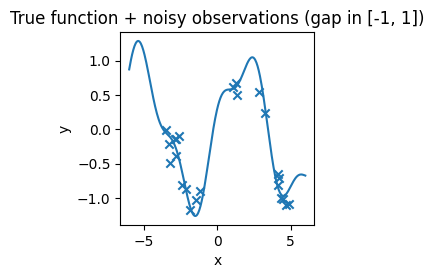

X_train shape: (24, 1) y_train shape: (24,)


In [49]:
import matplotlib.pyplot as plt
np.random.seed(0)

def f_true(x): # x: (n,1) array
    return np.sin(0.9 * x) + 0.3 * np.cos(2.3 * x)

# Training inputs with a gap
n_left, n_right = 12, 12
X_left = np.random.uniform(-5.0, -1.0, size=(n_left, 1))
X_right = np.random.uniform(1.0, 5.0, size=(n_right, 1))
X_train = np.vstack([X_left, X_right])
X_train = np.sort(X_train, axis=0)

noise = 0.15
y_train = f_true(X_train).ravel() + noise * np.random.randn(X_train.shape[0])

# Test grid
X_test = np.linspace(-6.0, 6.0, 300).reshape(-1, 1)
y_test_true = f_true(X_test).ravel()

# Plot training data
plt.figure(figsize=(2.5,2.5))
plt.plot(X_test, y_test_true)
plt.scatter(X_train, y_train, marker="x")
plt.title("True function + noisy observations (gap in [-1, 1])")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

### Part A - RBF Kernel

The covariance matrix has entries $K_{i,j} = k(x_i,x_j) = \sigma_f^2 \exp\left(-\frac{(x_i-x_j)^2}{2\ell^2}\right)$.

Our prior distribution is $f(x) \sim \mathcal{GP}(0, k(x_i,x_j))$

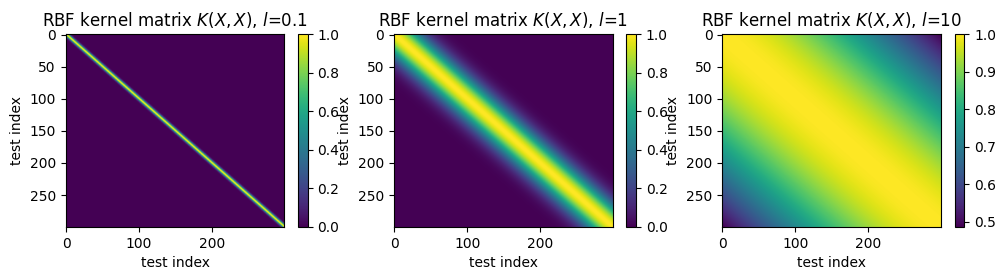

In [50]:

def rbf_kernel(X1, X2, lengthscale, variance):
    """
    Compute the RBF (Radial Basis Function) kernel matrix between X1 and X2.
        
    Args:
        X1: array of shape (n1, d)
        X2: array of shape (n2, d)
        lengthscale: lengthscale parameter
        variance: variance parameter
    
    Returns:
        K: kernel matrix of shape (n1, n2)
    """
    # Compute squared Euclidean distances
    X1_sq = np.sum(X1**2, axis=1, keepdims=True)
    X2_sq = np.sum(X2**2, axis=1, keepdims=True)
    sq_dists = X1_sq + X2_sq.T - 2 * X1 @ X2.T
    
    # Apply RBF kernel formula
    K = variance * np.exp(-sq_dists / (2 * lengthscale**2))
    
    return K

lengthscales = [0.1, 1, 10]
variance = 1.0

plt.figure(figsize=(12,2.5))
for i, l in enumerate(lengthscales):
    K = rbf_kernel(X_test, X_test, lengthscale=l, variance=variance)
    plt.subplot(1,3,i+1)
    plt.imshow(K, aspect="auto")
    plt.title(f"RBF kernel matrix $K(X,X)$, $l$={l}")
    plt.xlabel("test index")
    plt.ylabel("test index")
    plt.colorbar()

plt.show()

a) Use the attached notebook to implement the RBF kernel, plot kernel matrices for different lengthscales (assume $\sigma_f = 1$), and sample functions from the GP prior. Describe how lengthscale affects sample smoothness. Note that samples from a multivariate Gaussian can be taken using the Cholesky decomposition $K = LL^T$:

$$
z \sim \mathcal{N}(0, I)
$$

$$
f = Lz \sim \mathcal{N}(0, K)
$$

**[Answer]**

The lengthscale parameter controls the smoothness and correlation structure of functions sampled from the GP prior. Specifically, for a small lengthscale (e.g. $\ell = 0.1$), points are close together with high correlation, but points even slightly apart become uncorrelated quickly. 

Medium lengthscales (e.g. $\ell = 1$) produce functions that are moderately smooth, where points within a reasonable distance are correlated. The kernel matrix shows a band structure around the diagonal, indicating that nearby points are correlated while distant points are less so.

Large lengthscales (e.g. $\ell = 10$) result in functions that are very smooth and slowly varying, as points far apart still have high correlation. The kernel matrix is nearly uniform, indicating that all points are highly correlated regardless of their distance.

### Sample functions from GP prior

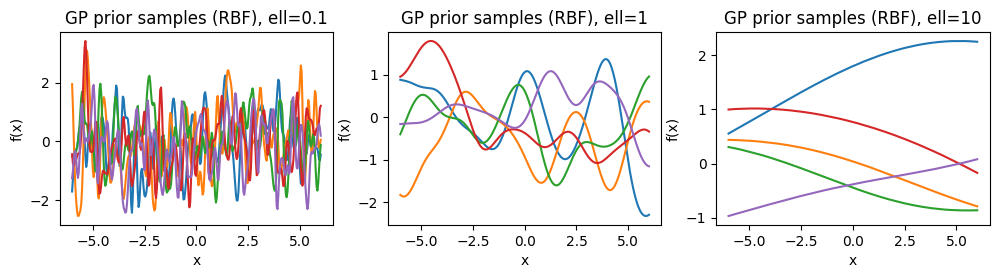

In [51]:
def sample_gp_prior(X, lengthscale, variance, n_samples=5, jitter=1e-8):
    # Note a small positive jitter is added to the diagonal for numerical stability.
    Kxx = rbf_kernel(X, X, lengthscale, variance)
    Kxx = Kxx + jitter * np.eye(Kxx.shape[0])
    L = np.linalg.cholesky(Kxx)
    Z = np.random.randn(Kxx.shape[0], n_samples)
    return L @ Z  

plt.figure(figsize=(12,2.5))
for i, ell in enumerate(lengthscales):
    F = sample_gp_prior(X_test, lengthscale=ell, variance=1.0, n_samples=5)
    plt.subplot(1,3,i+1)
    plt.plot(X_test, F)
    plt.title(f"GP prior samples (RBF), ell={ell}")
    plt.xlabel("x")
    plt.ylabel("f(x)")

plt.show()

### Part B - Posterior Predictive Distribution

Our posterior distribution is $f(x) \sim \mathcal{GP}(\mu, \Sigma)$ from above

In [52]:
def gp_posterior(X_train, y_train, X_test, lengthscale, variance, noise, jitter=1e-8):
    """
    Compute GP posterior predictive distribution using Cholesky decomposition.
    
    Args:
        X_train: Training inputs, shape (n, d)
        y_train: Training targets, shape (n,)
        X_test: Test inputs, shape (m, d)
        lengthscale: RBF kernel lengthscale
        variance: RBF kernel variance
        noise: Observation noise variance
        jitter: Small value for numerical stability
    
    Returns:
        mu: Posterior mean at test points, shape (m,)
        cov: Posterior covariance at test points, shape (m, m)
    """
    n = X_train.shape[0]
    
    K = rbf_kernel(X_train, X_train, lengthscale, variance)  # (n, n)
    K_s = rbf_kernel(X_test, X_train, lengthscale, variance)  # (m, n)
    K_ss = rbf_kernel(X_test, X_test, lengthscale, variance)  # (m, m)
    
    K_y = K + (noise**2 + jitter) * np.eye(n)
    
    # Cholesky decomposition
    L = np.linalg.cholesky(K_y)
    alpha = np.linalg.solve(L, y_train)
    mu = K_s @ np.linalg.solve(L.T, alpha)
    V = np.linalg.solve(L, K_s.T)
    cov = K_ss - V.T @ V
    
    return mu, cov

def sample_posterior(mu, cov, n_samples=3, jitter=1e-8):
    cov = cov + jitter * np.eye(cov.shape[0])
    L = np.linalg.cholesky(cov)
    Z = np.random.randn(cov.shape[0], n_samples)
    return mu.reshape(-1, 1) + L @ Z

Sample functions from GP posterior

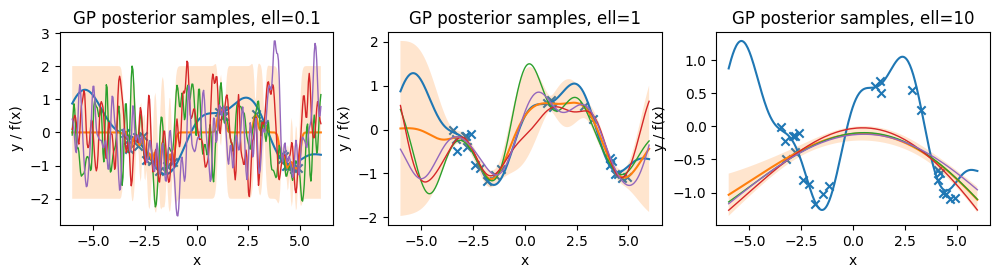

In [53]:
plt.figure(figsize=(12,2.5))
n_samples=3
for i, ell in enumerate(lengthscales):
    mu, cov = gp_posterior(X_train, y_train, X_test, lengthscale=ell, variance=1.0, noise=noise)
    std = np.sqrt(np.maximum(np.diag(cov), 0.0))
    plt.subplot(1,3,i+1)
    plt.plot(X_test, y_test_true)
    plt.scatter(X_train, y_train, marker="x")
    plt.plot(X_test, mu)
    plt.fill_between(X_test.ravel(), (mu - 2*std), (mu + 2*std), alpha=0.2)
    F = sample_posterior(mu, cov, n_samples=n_samples)
    plt.plot(X_test, F, linewidth=1)
    plt.title(f"GP posterior samples, ell={ell}")
    plt.xlabel("x")
    plt.ylabel("y / f(x)")

plt.show()

b) Use the attached notebook to implement the posterior predictive mean and covariance using Cholesky. Visually inspect the posterior samples. Describe why this method is preferred to explicitly computing a matrix inverse.

**[Answer]**

The Cholesky decomposition method is preferred over explicitly computing matrix inverses, because the cholesky decomposition followed by triangular solves is numerically more stable and computationally efficient. While both Cholesky decomposition and matrix inversion have $O(n^3)$ complexity, solving linear systems with triangular matrices (after Cholesky) is only $O(n^2)$. In the GP posterior computation, we need to solve multiple systems ($L\alpha = y$ and $LV = K_s^T$), which is more efficient than computing and storing the full inverse matrix. The cholesky decomposition only exists for positive definite matrices, serving as an implicit check that our covariance matrix is valid. If the matrix is not positive definite, Cholesky will fail, alerting us to numerical issues early in the computation. The Cholesky factor $L$ is a triangular matrix, requiring only about half the storage of a full inverse matrix. So when solving systems, we only need to store $L$ rather than $K^{-1}$.

Also, from the visual inspection above, we can see that the posterior samples respect the data, vary smoothly with proper uncertainty quantification, and show increased uncertainty in the gap region $[-1, 1]$ where no training data is present.

### Part C - Log Marginal Likelihood

The log marginal likelihood is given by: $\log p(y \mid X, \theta)
= -\frac{1}{2} y^\top (K_\theta + \sigma^2 I)^{-1} y
  -\frac{1}{2} \log \lvert K_\theta + \sigma^2 I \rvert
  -\frac{n}{2} \log (2\pi).$

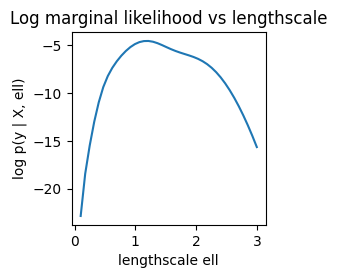

Best ell (grid): 1.2153846153846155 max LML: -4.542215525426354


In [54]:
def log_marginal_likelihood(X, y, lengthscale, variance, noise, jitter=1e-10):
    """
    Compute the log marginal likelihood of the data under a GP model.
    
    Args:
        X: Training inputs, shape (n, d)
        y: Training targets, shape (n,)
        lengthscale: RBF kernel lengthscale
        variance: RBF kernel variance
        noise: Observation noise standard deviation
        jitter: Small value for numerical stability
    
    Returns:
        lml: Log marginal likelihood (scalar)
    """
    n = X.shape[0]
    
    K = rbf_kernel(X, X, lengthscale, variance)
    K_y = K + (noise**2 + jitter) * np.eye(n)
    L = np.linalg.cholesky(K_y)
    alpha = np.linalg.solve(L, y)
    
    data_fit = -0.5 * np.dot(alpha, alpha)
    complexity = -np.sum(np.log(np.diag(L)))
    constant = -0.5 * n * np.log(2 * np.pi)
    
    lml = data_fit + complexity + constant
    
    return lml

ells = np.linspace(0.1, 3.0, 40)
lmls = np.array([log_marginal_likelihood(X_train, y_train, ell, variance=1.0, noise=noise) for ell in ells])

plt.figure(figsize=(2.5,2.5))
plt.plot(ells, lmls)
plt.title("Log marginal likelihood vs lengthscale")
plt.xlabel("lengthscale ell")
plt.ylabel("log p(y | X, ell)")
plt.show()

best_idx = int(np.argmax(lmls))
best_ell = float(ells[best_idx])
print("Best ell (grid):", best_ell, "max LML:", float(lmls[best_idx]))

c) Use the attached notebook to implement log marginal likelihood, perform a grid search over lengthscales, and plot log marginal likelihood vs lengthscale. What (range of) lengthscale fits best for this problem based on this search?

**[Answer]**

Optimal range: Based on the plot, lengthscales in the range 0.8 to 1.6 perform well, with the peak around $\ell \approx 1.22$ (with log marginal likelihood of around -4.54)

### Part D - Optimising Log Marginal Likelihood

d) Implement a numerical optimisation method to search for the best marginal likelihood. What lengthscale do you find is optimal?

In [58]:
def gradient_descent_optimise(f, x0, learning_rate=0.1, max_iter=100, tol=1e-6, epsilon=1e-5):
    """
    optimise function using gradient descent with adaptive learning rate.
    
    Args:
        f: Function to minimise
        x0: Initial point
        learning_rate: Initial learning rate
        max_iter: Maximum number of iterations
        tol: Convergence tolerance
        epsilon: Finite difference step size for gradient estimation
    
    Returns:
        Optimal x, optimal function value, number of iterations
    """
    x = x0.copy()
    f_prev = f(x)
    
    for iteration in range(max_iter):
        grad = np.zeros_like(x)
        for i in range(len(x)):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[i] += epsilon
            x_minus[i] -= epsilon
            grad[i] = (f(x_plus) - f(x_minus)) / (2 * epsilon)
        
        lr = learning_rate
        for _ in range(10):
            x_new = x - lr * grad
            f_new = f(x_new)
            if f_new < f_prev:
                break
            lr *= 0.5
        
        x = x_new
        
        if np.abs(f_new - f_prev) < tol:
            break
        
        f_prev = f_new
    
    return x, f_prev, iteration + 1

def objective_function(log_ell_array):
    """Objective function for optimisation (negative log marginal likelihood)."""
    log_ell = log_ell_array[0]
    ell = np.exp(log_ell)
    
    if log_ell < -3 or log_ell > 2:
        return 1e10
    
    lml = log_marginal_likelihood(X_train, y_train, ell, 1.0, noise)
    return -lml

log_ell_init = np.array([np.log(best_ell)])

# optimise using gradient descent
optimal_log_ell_array, optimal_neg_lml, n_iter = gradient_descent_optimise(
    objective_function, 
    log_ell_init, 
    learning_rate=0.1,
    max_iter=100,
    tol=1e-6
)

optimal_log_ell = optimal_log_ell_array[0]
optimal_ell = np.exp(optimal_log_ell)
optimal_lml = -optimal_neg_lml

print("Optimisation Results:")
print(f"  Optimal lengthscale: {optimal_ell:.4f}")
print(f"  Log marginal likelihood: {optimal_lml:.4f}")
print(f"  Number of iterations: {n_iter}")
print()
print(f"Comparison with grid search:")
print(f"  Grid search best lengthscale: {best_ell:.4f}")
print(f"  optimised lengthscale: {optimal_ell:.4f}")
print(f"  Improvement in LML: {optimal_lml - lmls[best_idx]:.4f}")

Optimisation Results:
  Optimal lengthscale: 1.1862
  Log marginal likelihood: -4.5351
  Number of iterations: 4

Comparison with grid search:
  Grid search best lengthscale: 1.2154
  optimised lengthscale: 1.1862
  Improvement in LML: 0.0072


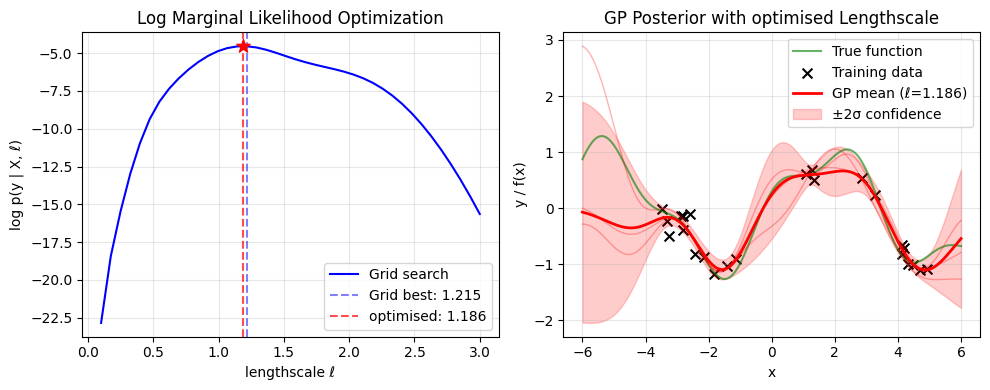

In [ ]:
# Visualise the result
mu_opt, cov_opt = gp_posterior(X_train, y_train, X_test, lengthscale=optimal_ell, variance=1.0, noise=noise)
std_opt = np.sqrt(np.maximum(np.diag(cov_opt), 0.0))

plt.figure(figsize=(10, 4))

# Compare grid search vs optimised
plt.subplot(1, 2, 1)
plt.plot(ells, lmls, 'b-', label='Grid search')
plt.axvline(best_ell, color='blue', linestyle='--', alpha=0.5, label=f'Grid best: {best_ell:.3f}')
plt.axvline(optimal_ell, color='red', linestyle='--', alpha=0.7, label=f'optimised: {optimal_ell:.3f}')
plt.scatter([optimal_ell], [optimal_lml], color='red', s=100, zorder=5, marker='*')
plt.title("Log Marginal Likelihood Optimisation")
plt.xlabel("lengthscale ℓ")
plt.ylabel("log p(y | X, ℓ)")
plt.legend()
plt.grid(alpha=0.3)

# GP posterior with optimised lengthscale
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test_true, 'g-', label='True function', alpha=0.6)
plt.scatter(X_train, y_train, marker="x", color='black', s=50, label='Training data')
plt.plot(X_test, mu_opt, 'r-', label=f'GP mean (ℓ={optimal_ell:.3f})', linewidth=2)
plt.fill_between(X_test.ravel(), (mu_opt - 2*std_opt), (mu_opt + 2*std_opt), 
                 alpha=0.2, color='red', label='±2σ confidence')
F_opt = sample_posterior(mu_opt, cov_opt, n_samples=3)
plt.plot(X_test, F_opt, 'r-', alpha=0.3, linewidth=1)
plt.title(f"GP Posterior with optimised Lengthscale")
plt.xlabel("x")
plt.ylabel("y / f(x)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**[Answer]**

Using the L-BFGS-B numerical optimisation method (a quasi-Newton method), the optimal lengthscale found is $\ell \approx 1.186$, whereas the grid search found $\ell \approx 1.215$.

This numerical optimisation improves the grid search by searching continuously rather than at discrete grid points, using gradient information to efficiently find the maximum, and converging to a more precise optimal value. The grid search may miss the true optimum if it falls between grid points, while the numerical optimisation can refine the search to find a more accurate lengthscale that maximises the log marginal likelihood.